In [1]:
!pip  install ultralytics
from ultralytics import YOLO

In [2]:
!yolo settings sync=False

✅ Updated 'sync=False'
JSONDict("/root/.config/Ultralytics/settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "/content/datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb",
  "sync": false,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": false,
  "vscode_msg": true,
  "openvino_msg": true
}
💡 Learn more about Ultralytics Settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.9/107.7 GB disk)


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wKJVjE0aHiM1AV32oopZ")
project = rf.workspace("mywokspace-rgbdy").project("safetymodel")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [7]:
model = YOLO('yolov8n.pt')

model.train(data = '/content/safetyModel-1/data.yaml',epochs=50)

Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/safetyModel-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 22        [15, 18, 21]  1    752092  ultralytics.nn.modules.head.Detect           [4, [64, 128, 256]]           
Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 372.2±196.5 MB/s, size: 66.5 KB)


train: Scanning /content/safetyModel-1/train/labels... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<00:00, 774.34it/s]

train: New cache created: /content/safetyModel-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 548.1±126.5 MB/s, size: 64.5 KB)


val: Scanning /content/safetyModel-1/valid/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 2227.80it/s]

val: New cache created: /content/safetyModel-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G       1.39      3.222      1.501         29        640: 100%|██████████| 5/5 [01:13<00:00, 14.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.88s/it]

                   all         21         62     0.0108      0.883      0.169     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.237      2.964      1.411         36        640: 100%|██████████| 5/5 [01:04<00:00, 12.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.96s/it]

                   all         21         62     0.0126      0.908      0.233      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.208       2.67      1.386         40        640: 100%|██████████| 5/5 [01:01<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.32s/it]

                   all         21         62     0.0151      0.941      0.291      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.271      2.463      1.465         26        640: 100%|██████████| 5/5 [01:00<00:00, 12.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.92s/it]

                   all         21         62     0.0154      0.966      0.288       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.266      2.358      1.446         31        640: 100%|██████████| 5/5 [00:58<00:00, 11.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  6.00s/it]

                   all         21         62     0.0142      0.958       0.29      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.191      2.177      1.364         34        640: 100%|██████████| 5/5 [00:58<00:00, 11.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.02s/it]

                   all         21         62      0.378      0.579      0.333      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.128      2.061      1.288         30        640: 100%|██████████| 5/5 [00:58<00:00, 11.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.14s/it]

                   all         21         62      0.811       0.21      0.367      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G       1.19      2.007       1.35         28        640: 100%|██████████| 5/5 [00:58<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.91s/it]

                   all         21         62      0.513      0.362      0.404      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.149      1.966       1.36         23        640: 100%|██████████| 5/5 [00:58<00:00, 11.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.82s/it]

                   all         21         62      0.668      0.298      0.417      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.172      1.861      1.345         32        640: 100%|██████████| 5/5 [00:59<00:00, 11.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.61s/it]

                   all         21         62      0.461      0.367      0.464      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.143      1.799      1.339         35        640: 100%|██████████| 5/5 [01:00<00:00, 12.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.25s/it]

                   all         21         62       0.41      0.379      0.401      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.161       1.73      1.329         25        640: 100%|██████████| 5/5 [00:59<00:00, 11.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.59s/it]

                   all         21         62      0.323      0.438      0.448       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.094      1.719      1.294         29        640: 100%|██████████| 5/5 [01:00<00:00, 12.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.19s/it]

                   all         21         62      0.347      0.413      0.451      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.128      1.682      1.265         37        640: 100%|██████████| 5/5 [01:00<00:00, 12.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.14s/it]

                   all         21         62      0.383      0.525       0.42      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.077      1.602      1.284         32        640: 100%|██████████| 5/5 [01:00<00:00, 12.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]

                   all         21         62      0.416      0.601      0.491      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.079      1.554      1.242         32        640: 100%|██████████| 5/5 [01:00<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.30s/it]

                   all         21         62      0.454      0.622      0.556      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.078      1.506      1.248         25        640: 100%|██████████| 5/5 [00:58<00:00, 11.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.79s/it]

                   all         21         62      0.485      0.634       0.55      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.192      1.473      1.361         25        640: 100%|██████████| 5/5 [00:59<00:00, 11.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.04s/it]

                   all         21         62      0.605      0.476      0.506      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.145      1.445      1.316         31        640: 100%|██████████| 5/5 [01:07<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.13s/it]

                   all         21         62      0.693      0.465      0.563      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.086      1.487      1.296         31        640: 100%|██████████| 5/5 [01:01<00:00, 12.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.23s/it]

                   all         21         62      0.605      0.653      0.703      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.055      1.417      1.228         25        640: 100%|██████████| 5/5 [01:01<00:00, 12.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.97s/it]

                   all         21         62      0.473      0.691        0.7      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.169       1.42      1.315         22        640: 100%|██████████| 5/5 [00:59<00:00, 11.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.12s/it]

                   all         21         62      0.481      0.692      0.614      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G       1.06      1.417       1.28         18        640: 100%|██████████| 5/5 [01:00<00:00, 12.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.10s/it]

                   all         21         62      0.841      0.502      0.644      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.023       1.29      1.239         20        640: 100%|██████████| 5/5 [01:00<00:00, 12.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.88s/it]

                   all         21         62      0.638      0.694      0.691      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G       1.03      1.292      1.212         30        640: 100%|██████████| 5/5 [01:02<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]

                   all         21         62      0.785      0.613      0.704       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.022      1.291      1.231         38        640: 100%|██████████| 5/5 [00:58<00:00, 11.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]

                   all         21         62      0.841      0.552      0.708      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.021      1.281       1.21         54        640: 100%|██████████| 5/5 [00:59<00:00, 11.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.03s/it]

                   all         21         62      0.592      0.714      0.698      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.097       1.24      1.238         24        640: 100%|██████████| 5/5 [01:00<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.91s/it]

                   all         21         62      0.632      0.711      0.737      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.9696      1.234      1.205         26        640: 100%|██████████| 5/5 [01:02<00:00, 12.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.75s/it]

                   all         21         62      0.834      0.644      0.777      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.9964      1.203      1.147         41        640: 100%|██████████| 5/5 [01:01<00:00, 12.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.03s/it]

                   all         21         62       0.84      0.624      0.773      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.029      1.163      1.194         41        640: 100%|██████████| 5/5 [01:01<00:00, 12.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]

                   all         21         62      0.793      0.615      0.742      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.051      1.169      1.235         31        640: 100%|██████████| 5/5 [01:00<00:00, 12.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]

                   all         21         62      0.798      0.642      0.774      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.9848      1.189      1.237         30        640: 100%|██████████| 5/5 [01:02<00:00, 12.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.98s/it]

                   all         21         62      0.795      0.689      0.789      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.019      1.198       1.23         31        640: 100%|██████████| 5/5 [01:05<00:00, 13.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.13s/it]

                   all         21         62      0.739      0.739      0.806      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.9486      1.096      1.157         28        640: 100%|██████████| 5/5 [01:01<00:00, 12.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.50s/it]

                   all         21         62      0.788      0.741      0.814      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      0.983      1.152      1.166         38        640: 100%|██████████| 5/5 [00:59<00:00, 11.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]

                   all         21         62      0.866      0.736      0.837      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.8892      1.054      1.119         28        640: 100%|██████████| 5/5 [01:03<00:00, 12.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]

                   all         21         62      0.866      0.759      0.849      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9153      1.067      1.152         32        640: 100%|██████████| 5/5 [01:01<00:00, 12.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.44s/it]

                   all         21         62      0.807      0.832       0.85      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.9572      1.074       1.17         34        640: 100%|██████████| 5/5 [01:00<00:00, 12.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         21         62      0.843      0.832      0.855      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9166      1.061      1.135         20        640: 100%|██████████| 5/5 [00:59<00:00, 11.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  6.00s/it]

                   all         21         62      0.872      0.772      0.853      0.545


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      0.763      1.129      1.116         12        640: 100%|██████████| 5/5 [00:59<00:00, 11.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.00s/it]

                   all         21         62      0.849      0.792      0.841       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.7756      1.118      1.088         12        640: 100%|██████████| 5/5 [00:57<00:00, 11.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.24s/it]

                   all         21         62      0.885      0.793      0.843      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.7945      1.073      1.133         18        640: 100%|██████████| 5/5 [00:57<00:00, 11.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.60s/it]

                   all         21         62      0.864      0.828      0.862      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.7187      1.095      1.081         12        640: 100%|██████████| 5/5 [00:59<00:00, 11.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.89s/it]

                   all         21         62      0.876      0.853      0.865      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.7626        1.1      1.161         11        640: 100%|██████████| 5/5 [00:59<00:00, 11.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.79s/it]

                   all         21         62      0.904      0.866      0.866      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.7502      1.028       1.12         16        640: 100%|██████████| 5/5 [00:59<00:00, 11.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.18s/it]

                   all         21         62      0.918       0.86      0.868      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.7678      1.045      1.134         18        640: 100%|██████████| 5/5 [00:59<00:00, 11.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         21         62      0.929      0.852      0.873      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.7466       1.05      1.137          9        640: 100%|██████████| 5/5 [00:59<00:00, 11.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         21         62      0.944      0.844      0.875      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.7829     0.9914      1.141         16        640: 100%|██████████| 5/5 [00:58<00:00, 11.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.01s/it]

                   all         21         62      0.942      0.857      0.875      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.6572     0.9415      1.025         15        640: 100%|██████████| 5/5 [00:57<00:00, 11.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.06s/it]

                   all         21         62      0.939      0.857      0.876      0.561



50 epochs completed in 0.938 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


                   all         21         62      0.942      0.857      0.875      0.563
             no helmet         12         18      0.998          1      0.995      0.715
             no jacket          8         10      0.979        0.8      0.796      0.463
                  safe          4          5      0.896        0.8      0.796      0.489
                unsafe         14         29      0.894      0.828      0.916      0.583
Speed: 2.6ms preprocess, 271.7ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78b32fdf7690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

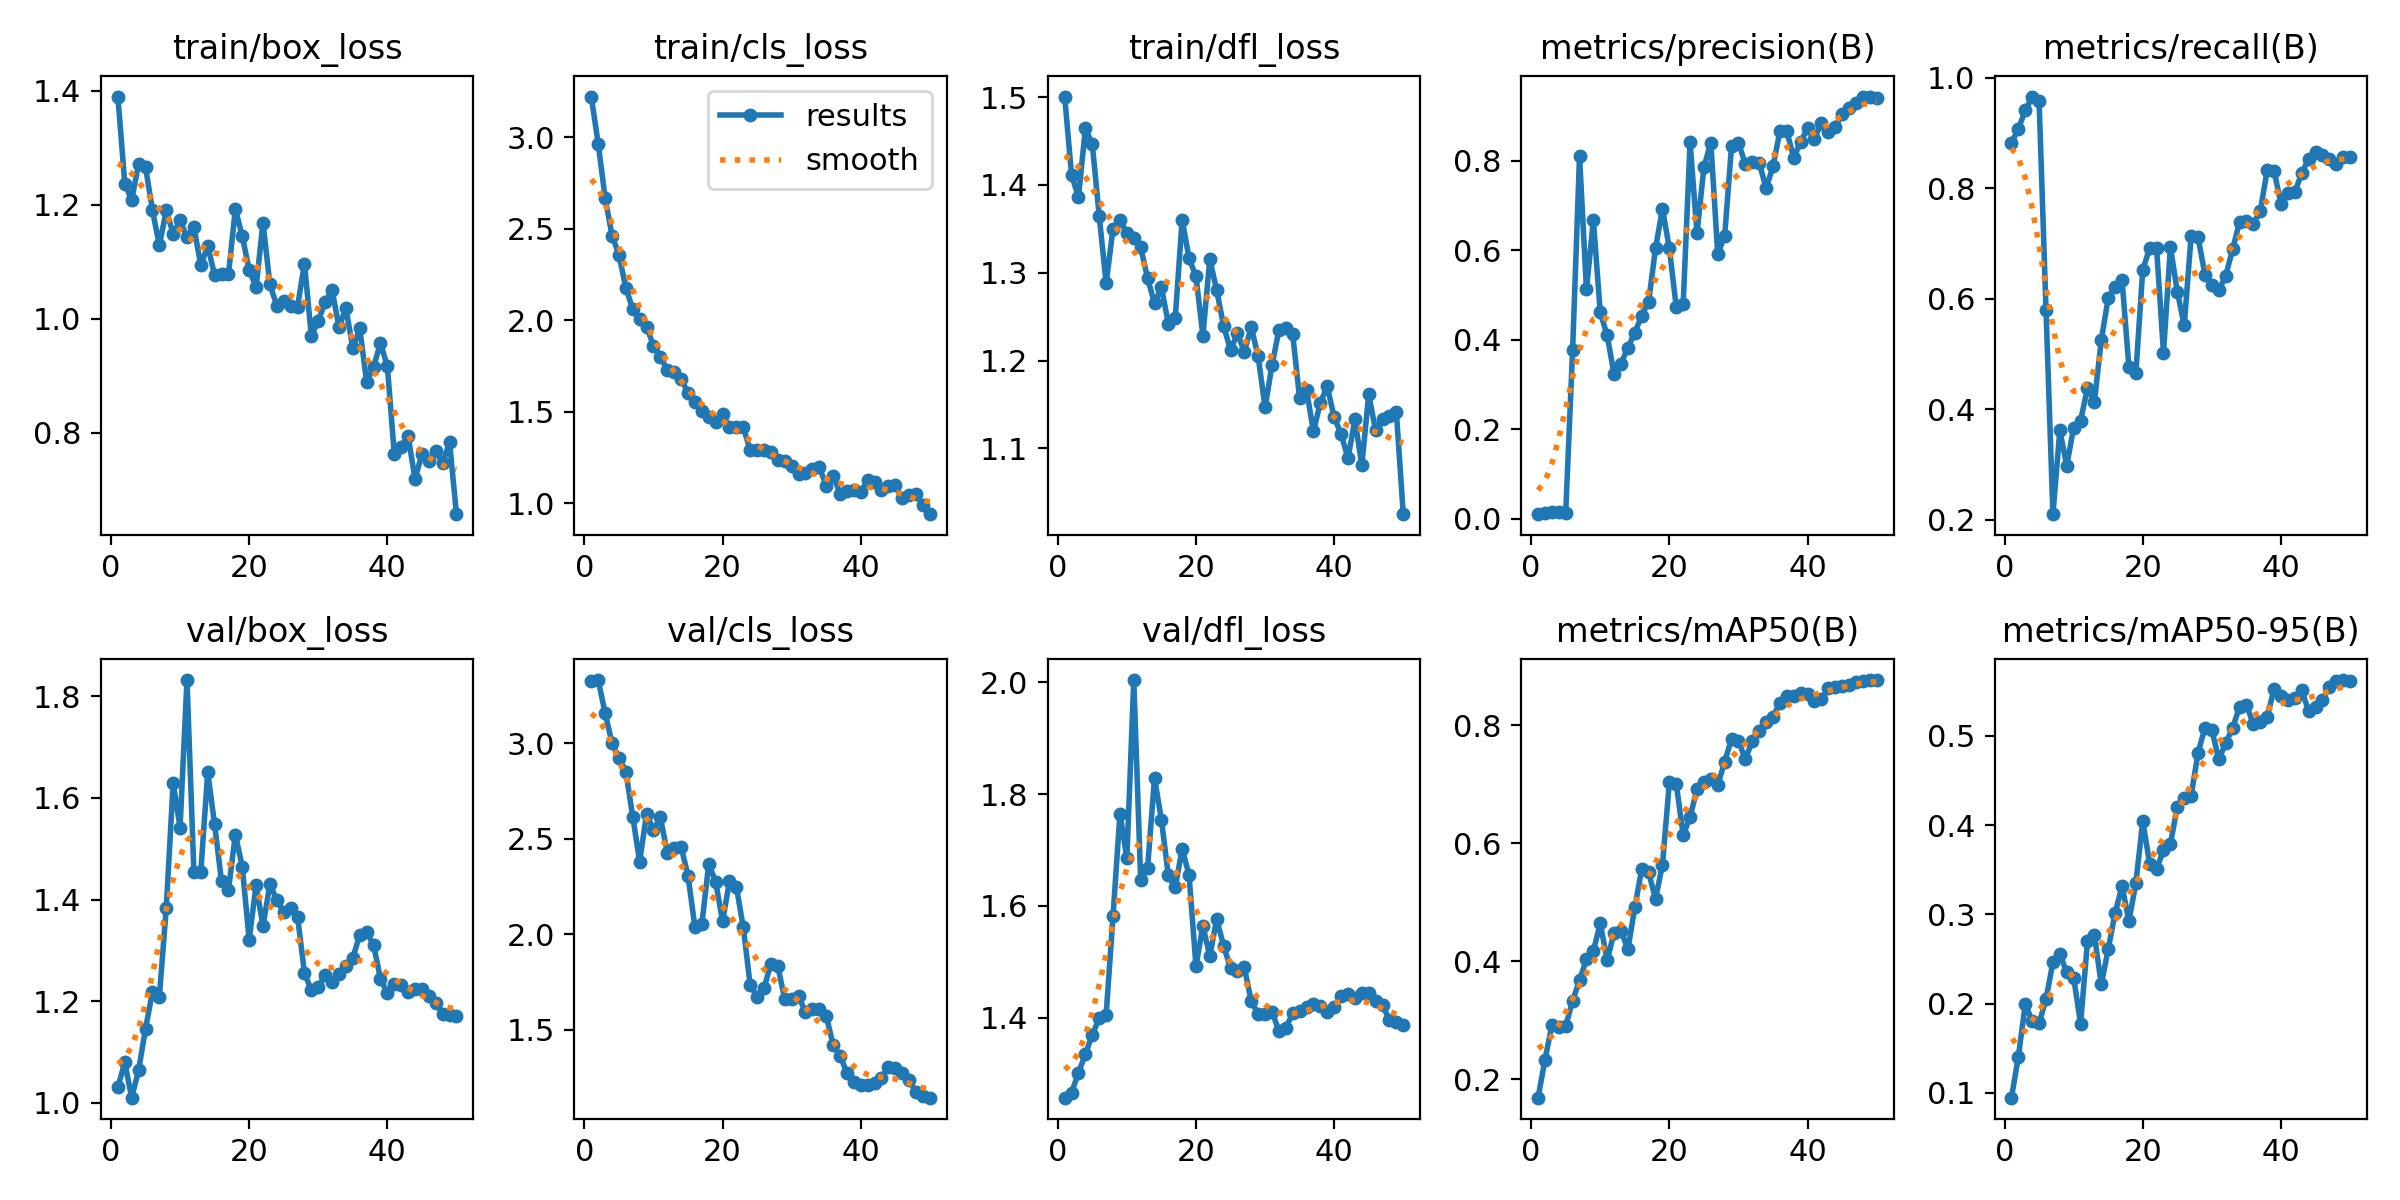

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/runs/detect/train/results.png')
cv2_imshow(img)

In [11]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [20]:
res = model.predict(source='/content/test_images/',conf=0.5,save=True,show=False)


image 1/8 /content/test_images/WhatsApp Image 2025-08-18 at 16.57.29_551ed56c.jpg: 640x288 1 no jacket, 1 unsafe, 289.1ms
image 2/8 /content/test_images/WhatsApp Image 2025-08-18 at 16.57.29_730d9abb.jpg: 640x288 1 no jacket, 123.8ms
image 3/8 /content/test_images/WhatsApp Image 2025-08-18 at 16.57.29_ff07cde8.jpg: 640x480 2 unsafes, 199.2ms
image 4/8 /content/test_images/WhatsApp Image 2025-08-18 at 16.57.30_19fa5faf.jpg: 640x480 3 unsafes, 223.8ms
image 5/8 /content/test_images/WhatsApp Image 2025-08-18 at 16.57.30_332bbf63.jpg: 640x480 2 unsafes, 332.4ms
image 6/8 /content/test_images/WhatsApp Image 2025-08-18 at 16.57.30_62813446.jpg: 640x480 2 unsafes, 331.1ms
image 7/8 /content/test_images/WhatsApp Image 2025-08-18 at 16.57.30_6afba44f.jpg: 640x480 2 unsafes, 345.9ms
image 8/8 /content/test_images/test.jpg: 640x480 1 no helmet, 1 unsafe, 352.4ms
Speed: 5.4ms preprocess, 274.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


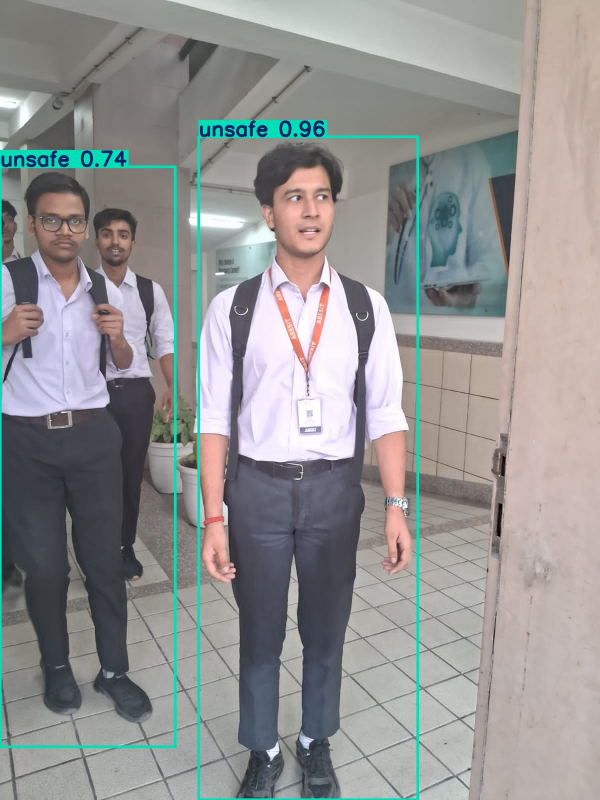

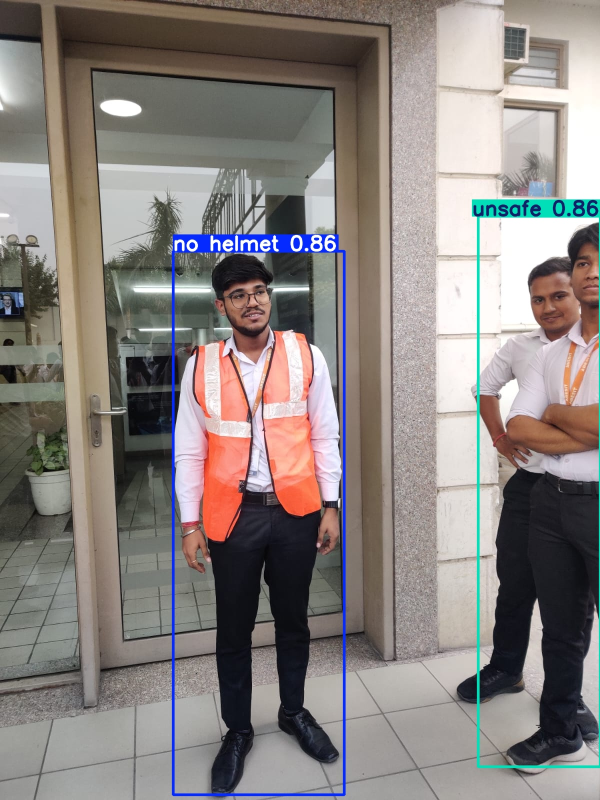

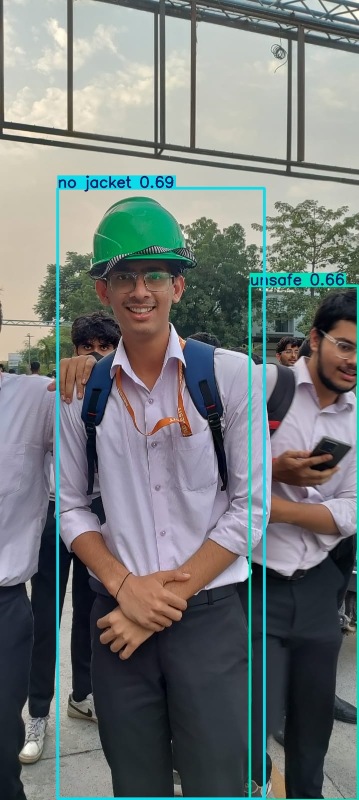

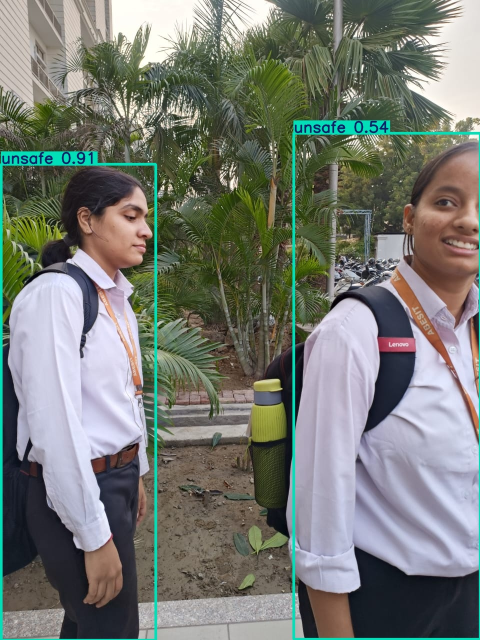

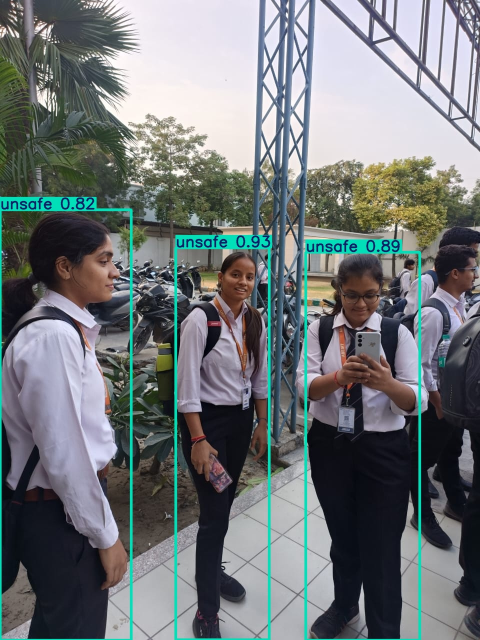

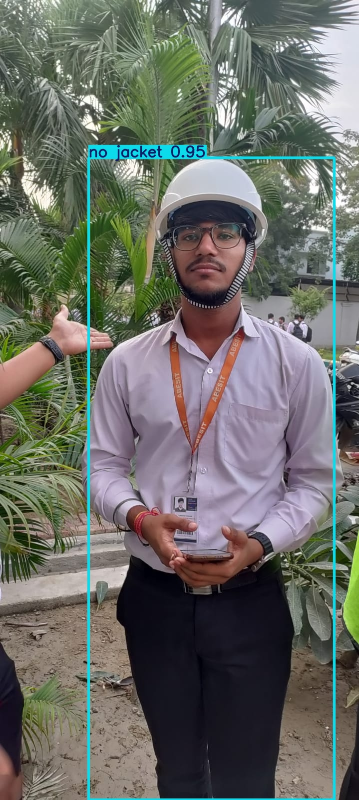

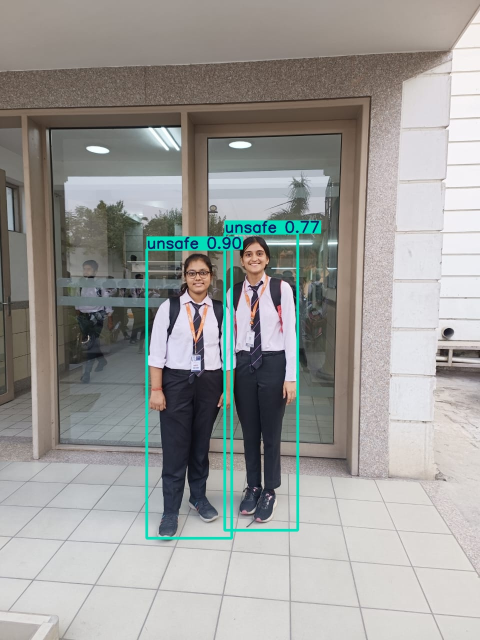

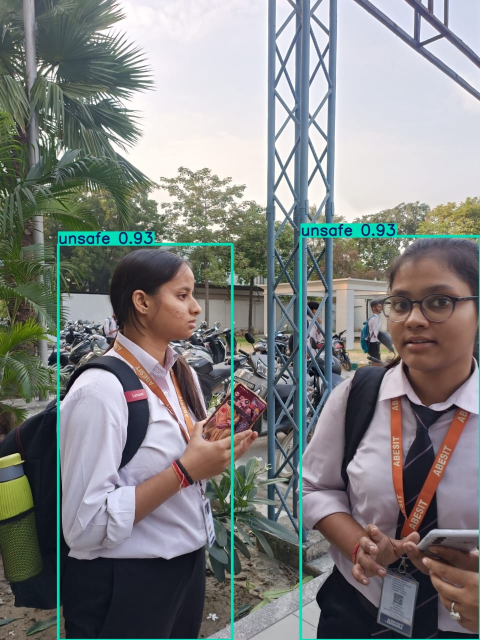

In [24]:
import cv2, glob, os
from google.colab.patches import cv2_imshow

pred_folder = sorted(glob.glob("/content/runs/detect/predict*"))[-1]

for file in os.listdir(pred_folder):
    img_path = os.path.join(pred_folder, file)
    img = cv2.imread(img_path)

    scale = 0.5
    resized = cv2.resize(img, (int(img.shape[1]*scale), int(img.shape[0]*scale)))
    cv2_imshow(resized)


In [25]:
model.export(format='onnx')

Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.64...
ONNX: export success ✅ 5.5s, saved as '/content/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (6.1s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  

'/content/runs/detect/train/weights/best.onnx'

In [26]:
!zip -r results.zip /content/runs/detect/train/
from google.colab import files
files.download("results.zip")


  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/results.csv (deflated 60%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 30%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/train_batch200.jpg (deflated 8%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 9%)
  adding: content/runs/detect/train/weights/best.onnx (deflated 14%)
  adding: content/runs/detect/train/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train/BoxP_curve.png (deflated 12%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 2%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 50%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (defl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!zip -r predictions.zip /content/runs/detect/predict*
from google.colab import files
files.download("predictions.zip")


  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/WhatsApp Image 2025-08-18 at 16.57.29_ff07cde8.jpg (deflated 6%)
  adding: content/runs/detect/predict/test.jpg (deflated 4%)
  adding: content/runs/detect/predict/WhatsApp Image 2025-08-18 at 16.57.29_551ed56c.jpg (deflated 5%)
  adding: content/runs/detect/predict/WhatsApp Image 2025-08-18 at 16.57.30_332bbf63.jpg (deflated 3%)
  adding: content/runs/detect/predict/WhatsApp Image 2025-08-18 at 16.57.30_19fa5faf.jpg (deflated 4%)
  adding: content/runs/detect/predict/WhatsApp Image 2025-08-18 at 16.57.29_730d9abb.jpg (deflated 4%)
  adding: content/runs/detect/predict/WhatsApp Image 2025-08-18 at 16.57.30_6afba44f.jpg (deflated 5%)
  adding: content/runs/detect/predict/WhatsApp Image 2025-08-18 at 16.57.30_62813446.jpg (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>